# Классификация текста

Данные представляют собой набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные.

Цель - создать модель, которая на основе текстового отзыва будет классифицировать его оценку.

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

### Данные

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head(4)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...


In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
df = df.dropna()

Также в данных есть отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов.

In [6]:
df = df[-df['review'].str.isspace()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [8]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

### Разбиение данных

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
X = df['review']
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Обучение модели

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [15]:
pipe_NB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),
                ('MultinomialNB', MultinomialNB())]

)

In [16]:
pipe_NB.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('MultinomialNB', MultinomialNB())])

### Результаты работы

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [18]:
preds = pipe_NB.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



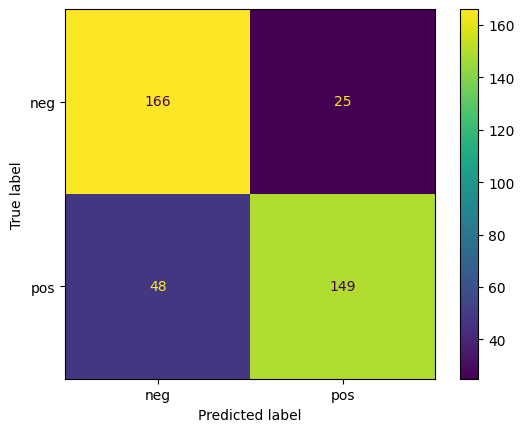

In [19]:
ConfusionMatrixDisplay.from_estimator (pipe_NB, X_test, y_test);